In [0]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://fortunedotcom.files.wordpress.com/2014/07/new-logos-airbnb.jpg")

In [0]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import seaborn as sns
import statsmodels.api as sm
import statsmodels as statm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotnine import *

In [0]:
filedata = pd.read_csv("train.csv")

In [0]:
#EDA
filedata.head(5)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [0]:
len(filedata.columns)

29

In [0]:
filedata.shape

(74111, 29)

In [0]:
filedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
host_since                73923 non-null object
instant_bookable          74111 non-null object
last_review               582

In [0]:
for col in filedata:
    if (filedata[col].isnull().any()):
        print(col)

bathrooms
first_review
host_has_profile_pic
host_identity_verified
host_response_rate
host_since
last_review
neighbourhood
review_scores_rating
thumbnail_url
zipcode
bedrooms
beds


In [0]:
#Filling the NA's
filedata=filedata.fillna(0)

In [0]:
filedata.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,1.126662e+07,4.782069,3.155146,1.231929,38.445958,-92.397525,20.900568,72.842520,1.264239,1.707844
std,6.081735e+06,0.717394,2.153589,0.584780,3.080167,21.705322,37.828641,39.920507,0.852773,1.255092
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,80.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,94.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,99.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [0]:
filedata.describe(include='all')

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
count,7.411100e+04,74111.000000,74111,74111,74111,74111.000000,74111.000000,74111,74111,74111,74111,74111,74111.0,74111,74111,74111,74111,74111,74111.0,74111.000000,74111.000000,74111,74111.0,74111.000000,74111.000000,74111.0,74111,74111.000000,74111.000000
unique,NaN,NaN,35,3,67122,NaN,NaN,5,5,2,6,73479,2555.0,3,3,81,3088,2,1372.0,NaN,NaN,73359,620.0,NaN,NaN,65884.0,770,NaN,NaN
top,NaN,NaN,Apartment,Entire home/apt,{},NaN,NaN,Real Bed,strict,True,NYC,"Hello, I've been running guest house for Korea...",0.0,t,t,100%,2015-03-30,f,0.0,NaN,NaN,Bunk bed in the Treat Street Clubhouse,0.0,NaN,NaN,0.0,11211.0,NaN,NaN
freq,NaN,NaN,49003,41310,586,NaN,NaN,72028,32374,54403,32349,8,15864.0,73697,49748,43254,246,54660,15827.0,NaN,NaN,8,6872.0,NaN,NaN,8216.0,1368,NaN,NaN
mean,1.126662e+07,4.782069,NaN,NaN,NaN,3.155146,1.231929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.445958,-92.397525,NaN,NaN,20.900568,72.842520,NaN,NaN,1.264239,1.707844
std,6.081735e+06,0.717394,NaN,NaN,NaN,2.153589,0.584780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.080167,21.705322,NaN,NaN,37.828641,39.920507,NaN,NaN,0.852773,1.255092
min,3.440000e+02,0.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.338905,-122.511500,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000
25%,6.261964e+06,4.317488,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.127908,-118.342374,NaN,NaN,1.000000,80.000000,NaN,NaN,1.000000,1.000000
50%,1.225415e+07,4.709530,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.662138,-76.996965,NaN,NaN,6.000000,94.000000,NaN,NaN,1.000000,1.000000
75%,1.640226e+07,5.220356,NaN,NaN,NaN,4.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.746096,-73.954660,NaN,NaN,23.000000,99.000000,NaN,NaN,1.000000,2.000000


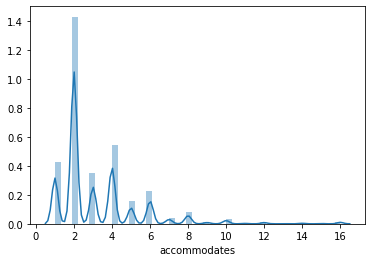

In [0]:
#Total rooms
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
numericdataX = filedata.select_dtypes(include=numerics)
x= numericdataX['accommodates']
sns.distplot(x);

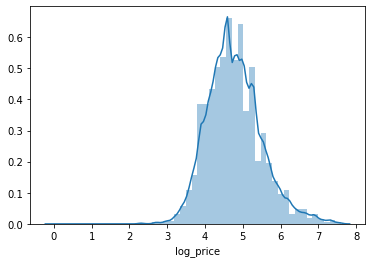

In [0]:
#Price distribution
x= numericdataX.iloc[:,1]
sns.distplot(x);

/usr/local/lib/python3.6/dist-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


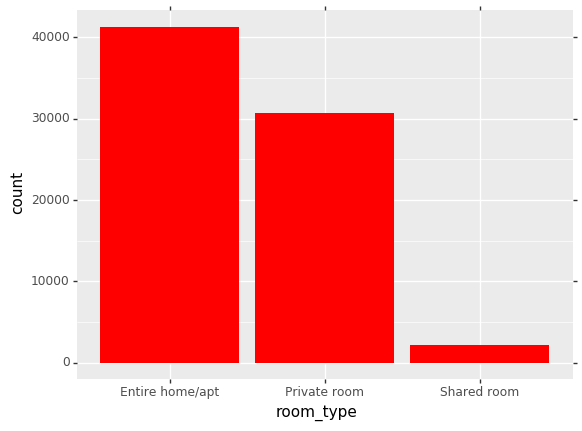

<ggplot: (8777980638030)>

In [0]:
#Types of bookings
ggplot(filedata, aes(x='room_type')) + geom_bar(fill = "red")

/usr/local/lib/python3.6/dist-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


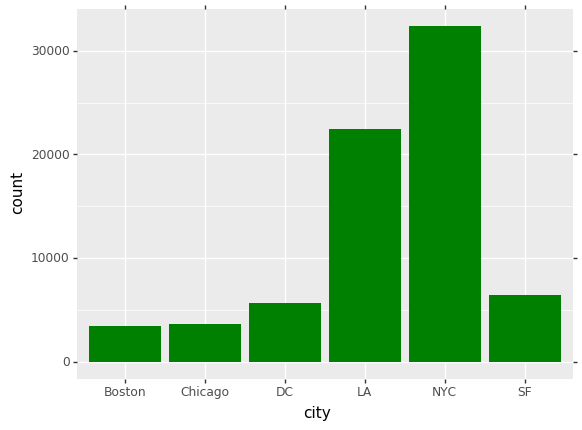

<ggplot: (8777979028288)>

In [0]:
#Most bookings in the city
ggplot(filedata, aes(x='city')) + geom_bar(fill = "green")

In [0]:
#Checking categorical data
filedata.describe(include=['O'])

,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,name,neighbourhood,thumbnail_url,zipcode
count,74111,74111,74111,74111,74111,74111,74111,74111,74111,74111,74111,74111,74111,74111,74111,74111,74111,74111
unique,35,3,67122,5,5,6,73479,2555,3,3,81,3088,2,1372,73359,620,65884,770
top,Apartment,Entire home/apt,{},Real Bed,strict,NYC,"Hello, I've been running guest house for Korea...",0,t,t,100%,2015-03-30,f,0,Bunk bed in the Treat Street Clubhouse,0,0,11211.0
freq,49003,41310,586,72028,32374,32349,8,15864,73697,49748,43254,246,54660,15827,8,6872,8216,1368


In [0]:
#check numeric data
filedata.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,1.126662e+07,4.782069,3.155146,1.231929,38.445958,-92.397525,20.900568,72.842520,1.264239,1.707844
std,6.081735e+06,0.717394,2.153589,0.584780,3.080167,21.705322,37.828641,39.920507,0.852773,1.255092
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,80.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,94.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,99.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [0]:
filedata.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


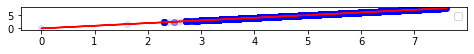

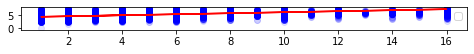

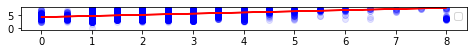

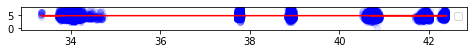

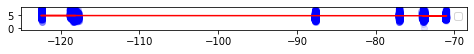

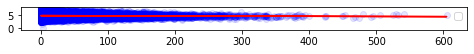

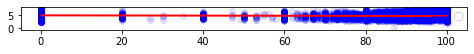

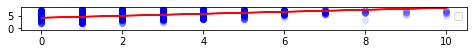

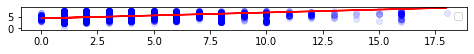

In [0]:
#Linear Assumptions
regressor = linear_model.LinearRegression()
for i in range(1,10): 
    x= np.array(numericdataX.iloc[:,i]).reshape(-1,1)
    y= np.array(filedata['log_price']).reshape(-1,1)
    regressor.fit(x,y)
    plt.figure(figsize=(8,5))
    plt.subplot(10,1,i)
    plt.scatter(x,y,color='blue', alpha=0.1)
    plt.plot(x,regressor.predict(x),color="red")
    plt.legend()

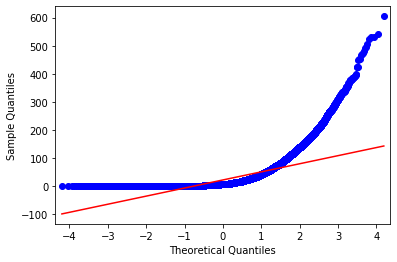

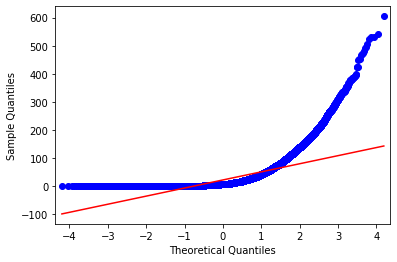

In [0]:
statm.graphics.gofplots.qqplot(numericdataX.iloc[:,6], line='r')

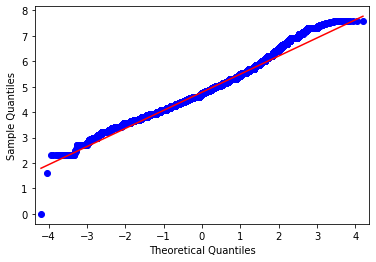

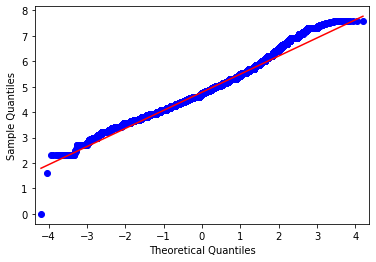

In [0]:
statm.graphics.gofplots.qqplot(numericdataX.iloc[:,1], line='r')

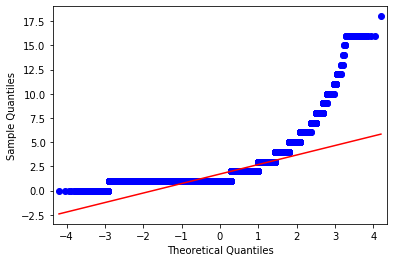

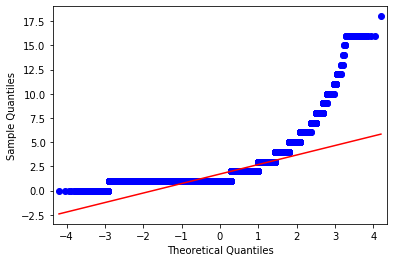

In [0]:
statm.graphics.gofplots.qqplot(numericdataX.iloc[:,9], line='r')

In [0]:
#Linear Regression
def checkCorrelation(data):
    """
    Plot correlation Matrix for given data
   :param data: dataset having features
   :return: return plot representing pearson correlation
   """
    plt.figure(figsize=(10, 10))
    sns.heatmap(data.corr(),linewidths=0.25,vmax=1.0,square=True,cmap="BuGn_r", 
    linecolor='w',annot=True)

In [0]:
def data_model(xdata):
    """
     fits linear regression model on given data
    :param xdata: independent variable dataset
    :return: linear regression model with fit of xdata 
   """
    #add constant to data
    X = sm.add_constant(xdata)
    targetY=filedata[['log_price']]
    y = targetY

    # Fit the linear model
    model = linear_model.LinearRegression()
    results = model.fit(X, y)
    model = sm.OLS(y, X)
    results = model.fit()
    return results

In [0]:
def data_summary(xdata):
    """
    Returns chart having summary of data
   :param xdata: independent variable dataset
   :return: summary of data 
   """
    results = data_model(xdata)
    return results.summary()

In [0]:
def crossValidationError(data):
    """
   Finds cross validation error of model
   :param X: independent variable dataset
   :return: float value returns mean squared error
   """
    numericdataX=data
    X = np.array(numericdataX.drop(['log_price'],axis=1), dtype=pd.Series)
    Y = np.array(numericdataX['log_price'], dtype=pd.Series)
    regr1 = linear_model.LinearRegression()
    ms_errors= cross_val_score(regr1, X, Y, cv=5, scoring = make_scorer(mean_squared_error))
    rms_errors = np.sqrt(ms_errors)
    mean_rms_error = rms_errors.mean()
    return mean_rms_error

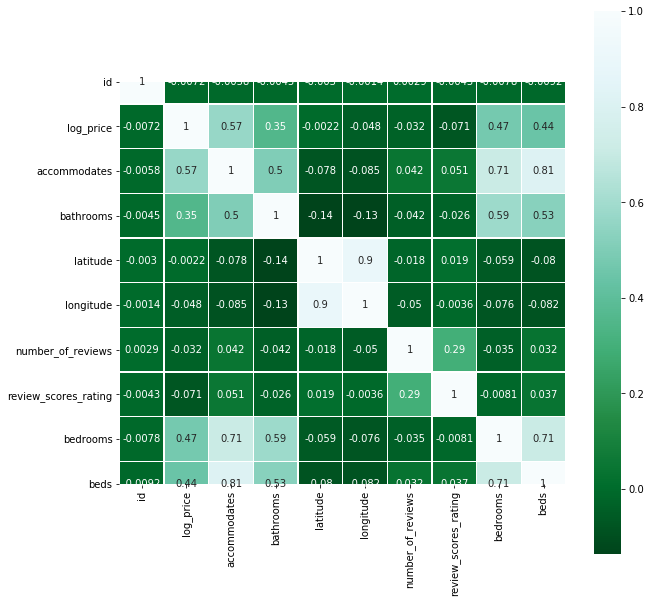

In [0]:
#Checking correlation in data
checkCorrelation(numericdataX)

In [0]:
#So as per correlation matrix colums such as latitude, longitude, number_of_reviews and review_scores_rating are not making much impact on log_price
#as valueof cirrelation is poor
#lets drop them from our dataset
numericdataX=numericdataX.drop(['id','number_of_reviews',
       'review_scores_rating','latitude',
       'longitude' ], axis=1)

In [0]:
# buid model and check summary
data_summary(numericdataX)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.577e+32
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        23:47:49   Log-Likelihood:             2.3108e+06
No. Observations:               74111   AIC:                        -4.622e+06
Df Residuals:                   74105   BIC:                        -4.622e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          5.96e-16   1.89e-16      3.150      0.002    2.25e-16    9.67e-16
log_price        1.0000   4.38e-17   2.28e+16      0.000       1.000       1.000
accommodates -1.506e-16   2.28e-17     -6.603      0.000   -1.95e-16   -1.06e-16
bathrooms      1.42e-16   5.52e-17      2.575      0.010    3.39e-17     2.5e-16
bedrooms       3.04e-16   4.78e-17      6.355      0.000     2.1e-16    3.98e-16
beds         -2.035e-16   3.71e-17     -5.482      0.000   -2.76e-16   -1.31e-16
==============================================================================
Omnibus:                     3706.026   Durbin-Watson:                   0.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4700.921
Skew:                           0.510   Prob(JB):                         0.00
Kurtosis:                       3.695   Cond. No.                         50.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
# there is also correlation between bathroom and accomodates and bedroom lets only keep acomodates
numericdataX = numericdataX.drop(['bathrooms','bedrooms','beds'], axis=1)

In [0]:
data_summary(numericdataX)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.660e+32
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        23:48:09   Log-Likelihood:             2.3081e+06
No. Observations:               74111   AIC:                        -4.616e+06
Df Residuals:                   74108   BIC:                        -4.616e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.484e-15   1.94e-16    -43.798      0.000   -8.86e-15    -8.1e-15
log_price        1.0000   4.49e-17   2.23e+16      0.000       1.000       1.000
accommodates -1.863e-16    1.5e-17    -12.455      0.000   -2.16e-16   -1.57e-16
==============================================================================
Omnibus:                     3562.244   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5412.252
Skew:                           0.433   Prob(JB):                         0.00
Kurtosis:                       4.001   Cond. No.                         45.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
crossValidationError(numericdataX)

0.5906434455693735

In [0]:
#Handing Categorical Variables
filedata.room_type.value_counts()

Entire home/apt    41310
Private room       30638
Shared room         2163
Name: room_type, dtype: int64

In [0]:
#creating dummy variable for column room_type
numericdataX=pd.concat([numericdataX,filedata['room_type']], axis=1)
numericdataX=pd.get_dummies(numericdataX,columns= ['room_type'],drop_first=True)

In [0]:
numericdataX

,log_price,accommodates,room_type_Private room,room_type_Shared room
0,5.010635,3,0,0
1,5.129899,7,0,0
2,4.976734,5,0,0
3,6.620073,4,0,0
4,4.744932,2,0,0
5,4.442651,2,1,0
6,4.418841,3,0,0
7,4.787492,2,0,0
8,4.787492,2,1,0
9,3.583519,2,1,0


In [0]:
filedata.bed_type.value_counts()

Real Bed         72028
Futon              753
Pull-out Sofa      585
Airbed             477
Couch              268
Name: bed_type, dtype: int64

In [0]:
numericdataX=pd.concat([numericdataX,filedata['bed_type']], axis=1)
numericdataX=pd.get_dummies(numericdataX,columns=['bed_type'],drop_first=True)

In [0]:
filedata.cancellation_policy.value_counts()

strict             32374
flexible           22545
moderate           19063
super_strict_30      112
super_strict_60       17
Name: cancellation_policy, dtype: int64

In [0]:
numericdataX=pd.concat([numericdataX,filedata['cancellation_policy']], axis=1)
numericdataX=pd.get_dummies(numericdataX,columns=['cancellation_policy'],drop_first=True)

In [0]:
filedata.city.value_counts()

NYC        32349
LA         22453
SF          6434
DC          5688
Chicago     3719
Boston      3468
Name: city, dtype: int64

In [0]:
numericdataX=pd.concat([numericdataX,filedata['city']], axis=1)
numericdataX=pd.get_dummies(numericdataX,columns=['city'],drop_first=True)

In [0]:
filedata.instant_bookable.value_counts()
numericdataX=pd.concat([numericdataX,filedata['instant_bookable']], axis=1)
numericdataX=pd.get_dummies(numericdataX,columns=['instant_bookable'],drop_first=True)